# 1 Regressão Linear com uma Variavel

## 1.1 Visualização dos Dados

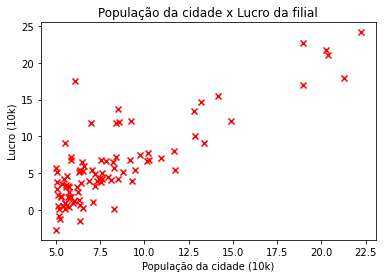

In [1]:
%matplotlib inline
%run parte1/plot_ex1data1.py
%run util/read_dataset.py

filepath = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t1/data/ex1data1.txt'
X, y = read_dataset(filepath)
plot(X, y)

## 1.2 Gradiente Descendente

In [2]:
%run util/read_dataset.py

filepath = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t1/data/ex1data1.txt'
X, y = read_dataset(filepath)

<Figure size 432x288 with 0 Axes>

In [3]:
X = np.c_[np.ones((X.shape[0], 1)), X]
X[:5]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [4]:
y[:5]

array([[17.592 ],
       [ 9.1302],
       [13.662 ],
       [11.854 ],
       [ 6.8233]])

In [5]:
%run parte1/custo_reglin_uni.py

theta = np.array([0,0], ndmin = 2).T
custo_reglin_uni(X, y, theta)

32.072733877455676

In [6]:
%run parte1/gd_reglin_uni.py

alpha = 0.01
epochs = 5000
history, theta = gd_reglin_uni(X, y, alpha, epochs)

print(theta)
print('Custo = ', history[-1])

[[-3.89530051]
 [ 1.19298539]]
Custo =  4.476971396982804


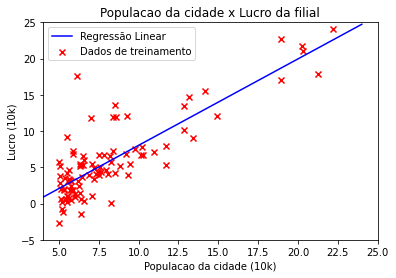

<Figure size 432x288 with 0 Axes>

In [7]:
%run parte1/visualizar_reta.py

filepath = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t1/data/ex1data1.txt'
X, y = read_dataset(filepath)
plot(X, y, theta)

In [8]:
new_x = np.array([35000,70000]).reshape(2,1) # ou np.array([[35000,70000]]).T
new_x = np.insert(new_x, 0, 1, axis=1)

y_pred = new_x.dot(theta)

print('Previsão do lucro para 35 mil habitantes = {0:.2f}'.format(y_pred[0,0]))
print('Previsão do lucro para 70 mil habitantes = {0:.2f}'.format(y_pred[1,0]))

Previsão do lucro para 35 mil habitantes = 41750.59
Previsão do lucro para 70 mil habitantes = 83505.08


## 1.3 Visualização de $J(\theta)$

/Users/edubezerra/ml-class/ml-t1/code/parte1/visualizar_J_contour.py:27: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(theta0, theta1, J, levels=np.logspace(-1, 4, 20), color='blue')


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

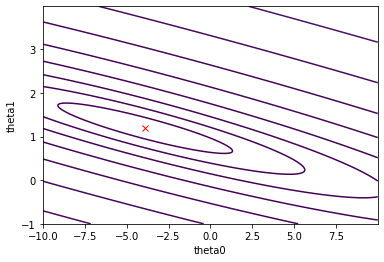

<Figure size 432x288 with 0 Axes>

In [9]:
%run parte1/visualizar_J_contour.py

X = np.c_[np.ones((X.shape[0], 1)), X]

J = plot(X, y, theta)

<Figure size 432x288 with 0 Axes>

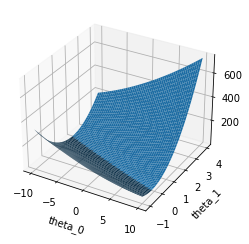

<Figure size 432x288 with 0 Axes>

In [10]:
%run parte1/visualizar_J_surface.py

plot(J)

# 2 Regressão Linear com Múltiplas Variáveis

## 2.1 Normalização das características

In [11]:
%run util/read_dataset.py

url = "https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t1/data/ex1data2.txt"
X, y = read_dataset(filepath=url)

<Figure size 432x288 with 0 Axes>

In [12]:
X[:5,:]

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4]])

In [13]:
y[:5,:]

array([[399900],
       [329900],
       [369000],
       [232000],
       [539900]])

In [14]:
%run util/normalizacao.py

X_norm, mean_X, std_X = normalizar_caracteristica(X)

In [15]:
X_norm[:5]

array([[ 0.13141542, -0.22609337],
       [-0.5096407 , -0.22609337],
       [ 0.5079087 , -0.22609337],
       [-0.74367706, -1.5543919 ],
       [ 1.27107075,  1.10220517]])

In [16]:
X_norm = np.insert(X_norm, 0, 1, axis=1)
X_norm[:5,:]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

## 2.2 Gradiente descendente

In [17]:
%run parte2/gd_reglin_multi.py

alpha = 0.01
epochs = 500
theta = np.array([[0,0,0]]).T #inicialização
history, theta = gd(X_norm, y, alpha, epochs, theta)

print(theta)
print('Custo = ', history[-1])

[[ 3.38175984e+05]
 [ 1.03032124e+05]
 [-2.02325233e+02]]
Custo =  2063782403.6748848


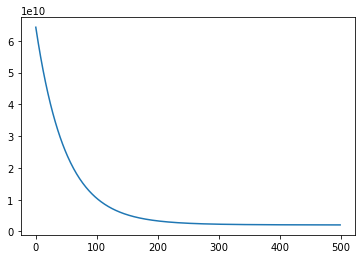

In [18]:
import matplotlib.pyplot as plt
plt.plot(history)

# 3 Regressão Logística

## 3.1 Visualização dos dados

<Figure size 432x288 with 0 Axes>

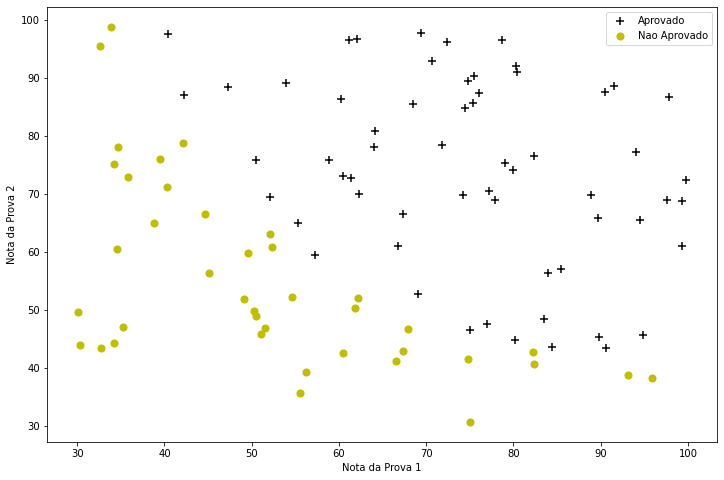

In [19]:
%run parte3/plot_ex2data1.py

import pandas as pd
filepath = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t1/data/ex2data1.txt'
data = pd.read_csv(filepath, header=None, names=['Prova 1', 'Prova 2', 'Aprovado'])
plot(data)

## 3.2 Implementação

### 3.2.1 Função sigmoide

In [20]:
%run util/sigmoide.py

input = np.array([0,100,-100])
sigmoide(input)

array([5.00000000e-01, 1.00000000e+00, 3.72007598e-44])

<Figure size 432x288 with 0 Axes>

### 3.2.2 Função de custo e gradiente

In [21]:
%run util/read_dataset.py
filepath = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t1/data/ex2data1.txt'

examData, labels = read_dataset(filepath)

In [22]:
examData[:5,:]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644]])

In [23]:
labels[:5]

array([[0],
       [0],
       [0],
       [1],
       [1]])

In [24]:
%run util/normalizacao.py

examData_norm, mean_examData, std_examData= normalizar_caracteristica(examData)
examData_norm[:5,:]

array([[-1.60224763,  0.63834112],
       [-1.82625564, -1.2075414 ],
       [-1.53903969,  0.3612943 ],
       [-0.28210129,  1.0863683 ],
       [ 0.69152826,  0.49337794]])

In [25]:
examData_norm = np.insert(examData_norm, 0, 1, axis=1)
examData_norm[:5,:]

array([[ 1.        , -1.60224763,  0.63834112],
       [ 1.        , -1.82625564, -1.2075414 ],
       [ 1.        , -1.53903969,  0.3612943 ],
       [ 1.        , -0.28210129,  1.0863683 ],
       [ 1.        ,  0.69152826,  0.49337794]])

In [26]:
%run parte3/custo_reglog.py

theta = np.array([[0,0,0]]) #inicialização
J = custo_reglog(theta, examData_norm, labels)
print('Custo = ', J)

Custo =  0.6931471805599453


### 3.2.3 Aprendizado dos parâmetros

In [27]:
%run parte3/gd_reglog.py

import scipy.optimize as opt

result = opt.fmin_tnc(func=custo_reglog, x0=theta, fprime=gd_reglog, args=(examData_norm, labels))
theta = result[0]
J = custo_reglog(theta, examData_norm, labels)

print('Vetor de parâmetros = ', theta)
print('Custo = ', J)

Vetor de parâmetros =  [1.71787865 3.99150586 3.72363974]
Custo =  0.20349771564617922


### 3.2.4 Avaliação do modelo

In [28]:
new_x = np.array([45,85]) 

new_x_norm = (new_x - mean_examData) / std_examData
new_x_norm = np.insert(new_x_norm, 0, 1)

theta = np.matrix(theta)

h = sigmoide(new_x_norm.dot(theta.T)) * 100

print('Probabilidade de aprovação: {0:.0f}%'.format(h[0,0]))

Probabilidade de aprovação: 78%


In [29]:
%run parte3/predizer_aprovacao.py

acc = acuracia(examData_norm, labels, theta)

print('Acurácia sobre o conjunto de treinamento: {0:.0f}%.'.format(acc))

Acurácia sobre o conjunto de treinamento: 89%.


# 4 Regressão Logística com Regularização

## 4.1 Visualização dos Dados

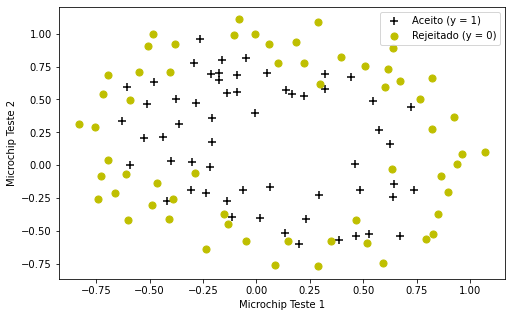

In [30]:
%run parte4/plot_ex2data2.py
%matplotlib inline

import pandas as pd
filepath = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t1/data/ex2data2.txt'
data = pd.read_csv(filepath, header=None, names=['Teste 1', 'Teste 2', 'Aceito'])
plot_microship_data(data)

## 4.2 Mapeamento de características (*feature mapping*)

In [31]:
%run util/read_dataset.py

filepath = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t1/data/ex2data2.txt'
X, y = read_dataset(filepath)
X[:5,:]

array([[ 0.051267,  0.69956 ],
       [-0.092742,  0.68494 ],
       [-0.21371 ,  0.69225 ],
       [-0.375   ,  0.50219 ],
       [-0.51325 ,  0.46564 ]])

<Figure size 432x288 with 0 Axes>

In [32]:
%run parte4/mapFeature.py

feature_1 = np.array(X[:,0])
feature_2 = np.array(X[:,1])

X = mapFeature(feature_1, feature_2)

print(X.shape)

(118, 28)


## 4.3 Função de custo e gradiente

In [33]:
%run parte4/custo_reglog_reg.py

_lambda = 1
theta = np.zeros((X.shape[1])) #inicialização
J = custo_reglog_reg(theta, X, y, _lambda)
print('Custo = ', J)

Custo =  0.6931471805599451


Para $\lambda$ = 0 (sem regularização)

In [34]:
%run parte4/custo_reglog_reg.py
%run parte4/gd_reglog_reg.py

_lambda = 0
theta = np.zeros((X.shape[1])) #inicialização
result = opt.fmin_tnc(func=custo_reglog_reg, x0=theta, fprime=gd_reglog_reg, args=(X, y, _lambda))
theta = result[0]
J = custo_reglog_reg(theta, X, y, _lambda)

print('Vetor de parâmetros = ', theta)
print('\nCusto = ', J)

Vetor de parâmetros =  [   9.05167612   10.638672      1.03345175  -94.94738736  -46.64461989
  -29.32210494  -90.71647906  -27.76763669    1.54629764   17.24025807
  358.81043326  298.8440019   335.66227242  106.23697385   20.18406964
  176.44511399  168.30068045  163.43887344   20.84697419  -10.49711957
   -3.02380999 -438.51710943 -507.16384027 -654.65806618 -392.82516118
 -382.29693237 -128.6584135   -22.63406356]

Custo =  0.2600017284426324


Para $\lambda$ = 100

In [35]:
_lambda = 100
theta = np.zeros((X.shape[1])) #inicialização
result = opt.fmin_tnc(func=custo_reglog_reg, x0=theta, fprime=gd_reglog_reg, args=(X, y, _lambda))
theta = result[0]
J = custo_reglog_reg(theta, X, y, _lambda)

print('Vetor de parâmetros = ', theta)
print('\nCusto = ', J)

Vetor de parâmetros =  [ 2.87015383e-04 -2.10544242e-03  1.22391072e-03 -6.79678110e-03
 -1.74408066e-03 -4.46041042e-03 -2.26497645e-03 -9.37866502e-04
 -1.13248462e-03 -2.62435498e-03 -5.46183984e-03 -3.06831194e-04
 -1.75796213e-03 -4.68279970e-04 -5.03984839e-03 -2.62545344e-03
 -5.89312935e-04 -4.48411790e-04 -7.84188445e-04 -6.48156747e-04
 -3.88185402e-03 -4.31900558e-03 -1.35539797e-04 -8.84096665e-04
 -4.96564783e-05 -9.97763028e-04 -2.09723993e-04 -5.06602296e-03]

Custo =  0.6927650676796886


Para $\lambda$ = 1

In [36]:
_lambda = 1
theta = np.zeros((X.shape[1])) #inicialização
result = opt.fmin_tnc(func=custo_reglog_reg, x0=theta, fprime=gd_reglog_reg, args=(X, y, _lambda))
theta = result[0]
J = custo_reglog_reg(theta, X, y, _lambda)

print('Vetor de parâmetros = ', theta)
print('\nCusto = ', J)

Vetor de parâmetros =  [ 0.51126521  0.28141979  0.56732707 -0.89264983 -0.33269562 -0.50931638
  0.06978521 -0.14679472 -0.15051146 -0.04162217 -0.63602971 -0.03068704
 -0.26998237 -0.08940903 -0.47099374 -0.07027425 -0.08868329 -0.0384868
 -0.11459476 -0.10674824 -0.18602658 -0.43208855  0.00445043 -0.13397984
 -0.00181124 -0.14157615 -0.03660799 -0.37996296]

Custo =  0.6518873011566129


## 4.4 Esboço da fronteira de decisão

/Users/edubezerra/ml-class/ml-t1/code/parte4/mapFeature.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(out)


Text(0.5, 1.0, 'lambda = 1.00')

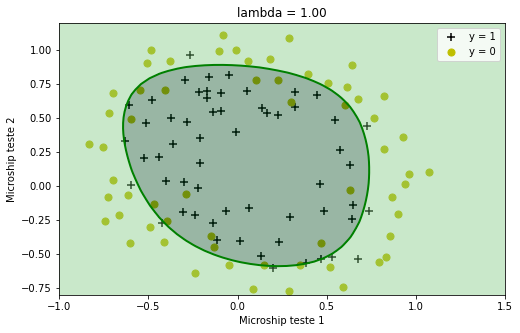

In [37]:
%run parte4/plot_ex2data2.py
%run parte4/plotDecisionBoundary.py
%matplotlib inline

import pandas as pd

filepath = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t1/data/ex2data2.txt'
data = pd.read_csv(filepath, header=None, names=['Teste 1', 'Teste 2', 'Aceito'])
plot_microship_data(data)

plotDecisionBoundary(theta, X, y)
plt.xlabel('Microship teste 1')
plt.ylabel('Microship teste 2')
plt.legend(['y = 1', 'y = 0'])
plt.grid(False)
plt.title('lambda = %0.2f' % _lambda)

# 5 Regressão Linear com Regularização

In [38]:
import scipy.io
import requests

filepath = 'https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ml-t1/data/ex5data1.mat?raw=true'
r = requests.get(filepath, allow_redirects=True)
open('ex5data1.mat', 'wb').write(r.content)

data = scipy.io.loadmat('ex5data1.mat')

_X, y = data['X'], data['y'] # conjunto de treinamento
_Xval, yval = data['Xval'], data['yval'] # conjunto de validação
_Xtest, ytest = data['Xtest'], data['ytest'] # conjunto de teste

## 5.1 Visualização dos Dados

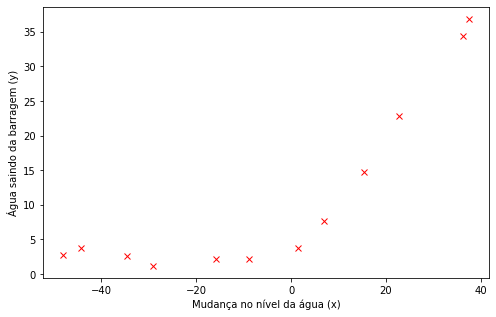

In [39]:
%run parte5/plot_ex5data1.py
%matplotlib inline

plot_ex5data1(_X, y)

## 5.2 Função de custo da regressão linear regularizada

In [40]:
X = np.insert(_X, 0, 1, axis=1)
Xval = np.insert(_Xval , 0, 1, axis=1)
Xtest = np.insert(_Xtest, 0, 1, axis=1)

In [41]:
%run parte5/custo_reglin_regularizada.py

_lambda = 1
theta = np.array([[1,1]]) #inicialização
J = custo_reglin_regularizada(theta, X, y, _lambda)
print('Custo = ', J)

Custo =  303.9931922202643


<Figure size 432x288 with 0 Axes>

## 5.3 Gradiente na regressão linear regularizada

In [42]:
%run parte5/gd_reglin_regularizada.py

theta = np.array([[1,1]]) #inicialização
gradiente = gd_reglin_regularizada(theta, X, y, _lambda=1)

print('Gradiente\n', gradiente)

Gradiente
 [[-15.30301567]
 [598.25074417]]


## 5.4 Ajustando os parâmetros da regressão linear

In [43]:
%run parte5/custo_reglin_regularizada.py
%run parte5/gd_reglin_regularizada.py
%run parte5/minimizar_funcao.py

_lambda = 0
result = minimizar_funcao(theta, X, y, _lambda)
theta = result[0]
J = custo_reglin_regularizada(theta, X, y, _lambda)

print('Vetor de parâmetros = ', theta)
print('Custo = ', J)

Vetor de parâmetros =  [13.08790348  0.36777923]
Custo =  22.373906495108912


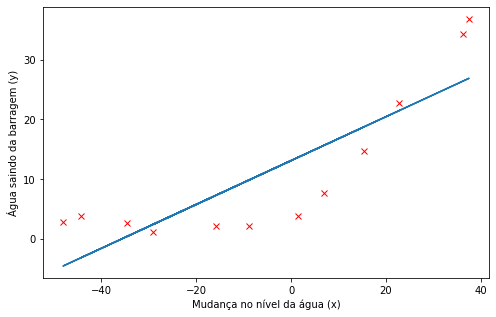

In [44]:
%matplotlib inline

h = X.dot(theta.T)
plot_ex5data1(_X, y)
plt.plot(_X, h)

# 6 Viés-Variância

## 6.1 Curvas de Aprendizado

<Figure size 432x288 with 0 Axes>

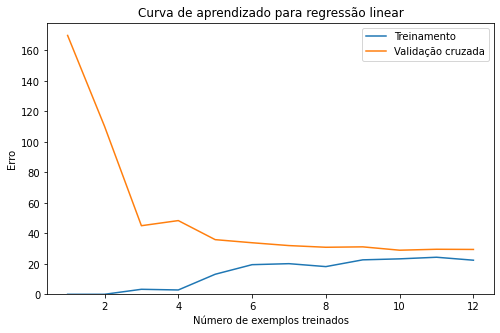

In [45]:
%run parte6/plot_learning_curve.py
%run parte6/learningCurve.py

theta = np.array([[1,1]]) #inicialização
numero_exemplos, erros_treino, erros_val = learningCurve(theta, X, y, Xval, yval, _lambda=0)

titulo = 'Curva de aprendizado para regressão linear'
plot_learning_curve(numero_exemplos, erros_treino, erros_val, titulo)

# 7 Regressão Polinomial

In [46]:
filepath = 'https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ml-t1/data/ex5data1.mat?raw=true'
r = requests.get(filepath, allow_redirects=True)
open('ex5data1.mat', 'wb').write(r.content)

data = scipy.io.loadmat('ex5data1.mat')

_X, y = data['X'], data['y'] # conjunto de treinamento

In [47]:
print('X original\n',_X[:5,:])

X original
 [[-15.93675813]
 [-29.15297922]
 [ 36.18954863]
 [ 37.49218733]
 [-48.05882945]]


## 7.1 Regressão Polinomial - aprendizado

In [48]:
%run parte7/poly_features.py

grau = 8
X_poli = poly_features(_X, grau)

<Figure size 432x288 with 0 Axes>

In [49]:
%run util/normalizacao.py

X_norm, mean_X, std_X = normalizar_caracteristica(X_poli)
print(X_norm[:5,:3]) #exibição somente das 3 primeiras colunas

[[-3.78243704e-01 -7.88662325e-01  1.90328720e-01]
 [-8.38920100e-01  1.31420204e-03 -2.58961742e-01]
 [ 1.43871736e+00  6.10831582e-01  1.30534069e+00]
 [ 1.48412330e+00  7.38068463e-01  1.42031240e+00]
 [-1.49791929e+00  1.93643966e+00 -2.12774745e+00]]


In [50]:
X_norm = np.insert(X_norm, 0, 1, axis=1)
print(X_norm[:5,:4]) #exibição somente das 4 primeiras colunas

[[ 1.00000000e+00 -3.78243704e-01 -7.88662325e-01  1.90328720e-01]
 [ 1.00000000e+00 -8.38920100e-01  1.31420204e-03 -2.58961742e-01]
 [ 1.00000000e+00  1.43871736e+00  6.10831582e-01  1.30534069e+00]
 [ 1.00000000e+00  1.48412330e+00  7.38068463e-01  1.42031240e+00]
 [ 1.00000000e+00 -1.49791929e+00  1.93643966e+00 -2.12774745e+00]]


In [51]:
%run parte5/minimizar_funcao.py

_lambda = 0.003
theta = np.ones((X_norm.shape[1])) #inicialização
result = minimizar_funcao(theta, X_norm, y, _lambda)
theta = result[0]

print('Vetor de parâmetros\n',theta)

Vetor de parâmetros
 [ 11.21758471  11.22029601  13.35871667   8.65566751  -9.30352639
 -10.74739878   4.28328256   1.6640661   -3.58639414]


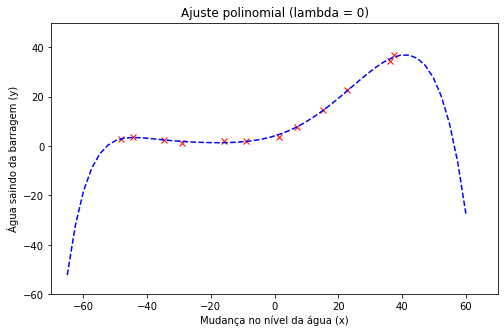

In [52]:
x = np.linspace(-65,60,50)
x = x.reshape((len(x),1))
x_poli = poly_features(x, grau)
x_poli = (x_poli - mean_X) / std_X
x_poli = np.insert(x_poli, 0, 1, axis=1)

h = x_poli.dot(np.matrix(theta).T)

plot_ex5data1(_X, y)
plt.plot(x, h, 'b--')
plt.title('Ajuste polinomial (lambda = 0)')
plt.axis((-70,70,-60,50))
plt.show()

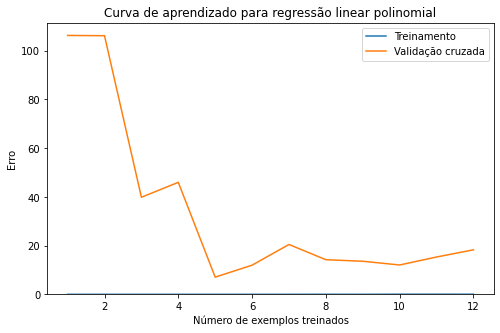

In [53]:
X_poli_val = poly_features(_Xval, grau)
X_norm_val, _, _ = normalizar_caracteristica(X_poli_val)
X_norm_val = np.insert(X_norm_val, 0, 1, axis=1)

theta = np.ones((X_norm_val.shape[1])) #inicialização
numero_exemplos, erros_treino, erros_val = learningCurve(theta, X_norm, y, X_norm_val, yval, _lambda=0)

titulo = 'Curva de aprendizado para regressão linear polinomial'

plot_learning_curve(numero_exemplos, erros_treino, erros_val, titulo)